<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Sentiment_Analysis_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
reviews = [
    'This product is amazing! I love it.',
    'Terrible experience, will not buy again.',
    'It works as expected. Nothing special.',
    'Absolutely fantastic! Exceeded my expectations.',
    'Not worth the price. Very disappointed.',
    'Great value for money.',
    'The quality is poor and it broke quickly.',
    'I am satisfied with my purchase.',
    'Worst product ever.',
    'Decent, but could be better.',
    'I really enjoyed using this.',
    'Not great, not terrible.',
    'I hated the experience.',
    'One of the best purchases I made.',
    'It was just okay.',
    'I will never recommend this to anyone.',
    'Excellent build quality.',
    'Feels cheap and flimsy.',
    'Top-notch and well-designed.',
    'Too expensive for the features.'
]
labels = [
    'positive', 'negative', 'neutral', 'positive', 'negative',
    'positive', 'negative', 'positive', 'negative', 'neutral',
    'positive', 'neutral', 'negative', 'positive', 'neutral',
    'negative', 'positive', 'negative', 'positive', 'negative'
]

df = pd.DataFrame({'review': reviews, 'label': labels})
print(df.head())


                                            review     label
0              This product is amazing! I love it.  positive
1         Terrible experience, will not buy again.  negative
2           It works as expected. Nothing special.   neutral
3  Absolutely fantastic! Exceeded my expectations.  positive
4          Not worth the price. Very disappointed.  negative


In [ ]:
sia = SentimentIntensityAnalyzer()
df['vader_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

def vader_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_pred'] = df['vader_score'].apply(vader_label)

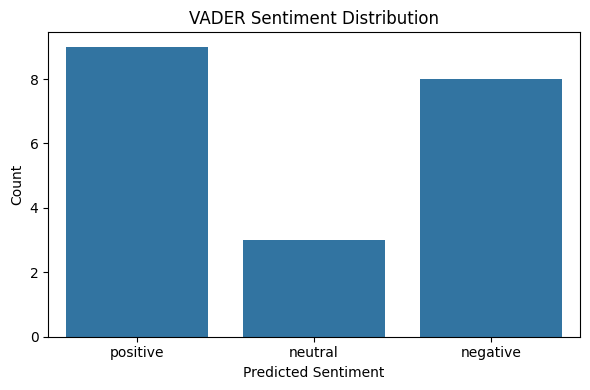

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='vader_pred', data=df, order=['positive', 'neutral', 'negative'])
plt.title('VADER Sentiment Distribution')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# B. Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# C. Training and Prediction
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    negative      0.500     0.333     0.400         3
     neutral      0.000     0.000     0.000         1
    positive      0.500     1.000     0.667         2

    accuracy                          0.500         6
   macro avg      0.333     0.444     0.356         6
weighted avg      0.417     0.500     0.422         6



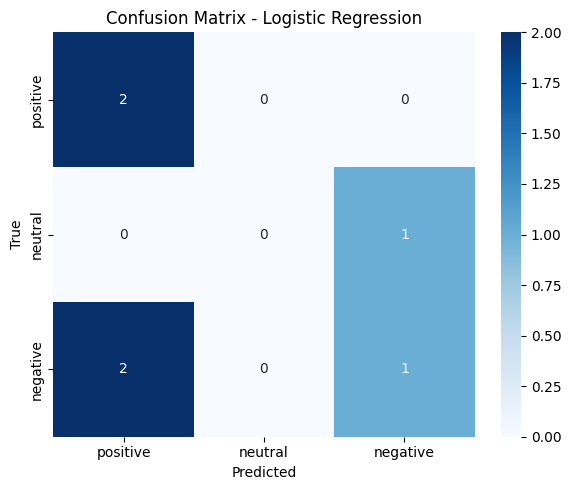

In [ ]:
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred, digits=3))

# B. Confusion Matrix
labels_order = ['positive', 'neutral', 'negative']
cm = confusion_matrix(y_test, y_pred, labels=labels_order)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_order, yticklabels=labels_order)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()


In [ ]:
print("\nSummary Comparison:")
print("- VADER: Rule-based, no training data needed, can miss context-specific sentiment.")
print("- Logistic Regression: Requires labeled data, can adapt to domain context, often more accurate with enough data.")


Summary Comparison:
- VADER: Rule-based, no training data needed, can miss context-specific sentiment.
- Logistic Regression: Requires labeled data, can adapt to domain context, often more accurate with enough data.
